1o μέρος: προσέγγιση κατάστασης υποθέτοντας θόρυβο στις μετρήσεις και γνώση του
παραμετρικού μοντέλου

(γνώση μορφής εξίσωσης, άγνωστες οι τιμές των συντελεστών στους όρους).

1. Θα δημιουργήσετε 150 τυχαίους πραγματικούς αριθμούς που ακολουθούν ομοιόμορφη
κατανομή. Φροντίστε ώστε η διάταξη με τους αριθμούς να βρίσκεται σε αύξουσα σειρά.
Όλοι οι αριθμοί πρέπει να ανήκουν στο διάστημα [-4, 4].


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

#Ορισμός του seed παραγωγής τυχαίων αριθμών.
run_with_seed = 6542468 #np.random.randint(0, 4294967295)
np.random.seed(run_with_seed)

#Δημιουργία τυχαίας λίστας με ομοιόμορφη κατανομή και ταξινόμηση των στοιχείων της σε αύξουσα σειρά.
randomNumList = np.random.uniform(-4, 4, 150)
sortedList = randomNumList
sortedList.sort()

2. Θα ορίσετε την ακόλουθη συνάρτηση (function): 𝑦 = (𝜆1) x (1/exp(𝑥)) + (𝜆2) x sin(𝑥), με όνομα
συνάρτησης myCustFunc().
H συνάρτηση myCustFunc(x, λ1, λ2 ) πρέπει να δέχεται σαν όρισμα μια διάταξη αριθμών σαν
και αυτή του ερωτήματος 1 και τις τιμές για τις παραμέτρους λ1 και λ2. Θα επιστρέφει μια
διάταξη(array) ίδιου μεγέθους με αυτή στην είσοδο.

In [2]:
#Ορισμός της συνάρτησης myCustFunc, η οποία επιστρέφει διάταξη ίδιου μεγέθους με την myArray.
def myCustFunc(myArray, l1, l2):
  newArray = (l1 * (1/(np.exp(myArray))) + l2 * (np.sin(myArray)))
  return newArray

3. Θα δημιουργήσετε ένα (1) νέο array μεγέθους 150 x 1, δίνοντας τιμές για τα λ1, λ2 και το
διάνυσμα x που προέκυψε από το ερώτημα 1.

In [3]:
#Δημιουργία λίστας μεγέθους 150 x 1, με παραμέτρους την ταξινομημένη λίστα του ερωτήματος 1 και με τυχαίες τιμές λ1 = 2 και λ2 = 3.
customProcessedList = myCustFunc(sortedList, 2, 3)
#customProcessedList = myCustFunc(sortedList100elements, 2, 3)

4. Δημιουργήστε μία γραφική παράσταση στην οποία θα φαίνονται τα δεδομένα που
δημιουργήσατε στα ερωτήματα 1 και 3. Τα outputs των συναρτήσεων πρέπει να
διαφοροποιούνται: χρησιμοποιήστε διαφορετικά χρώματα και σύμβολα. Μην ξεχάσετε να
βάλετε τίτλο, ονόματα αξόνων, και λεζάντα, για να ξέρουμε ποια συνάρτηση δημιούργησε
τα εκάστοτε δεδομένα.

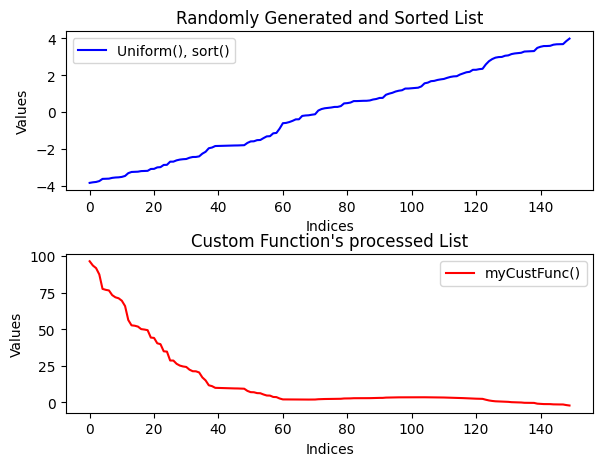

In [4]:
#Δημιουργία ενός γραφήματος που αποτελείται απο δύο υπογραφήματα.
fig, (subp1, subp2) = plt.subplots(2)
fig.tight_layout(pad = 2.5)

#Καταχώρηση στοιχείων στο πρώτο υπογράφημα που παρουσιάζει την ταξινομημένη λίστα με τους τυχαίους αριθμούς.
x1 = sortedList
subp1.plot(x1, 'b-', label = "Uniform(), sort()")
subp1.legend()
subp1.set_ylabel('Values')
subp1.set_xlabel('Indices')
subp1.set_title('Randomly Generated and Sorted List')

#Καταχώρηση στοιχείων στο δεύτερο υπογράφημα που παρουσιάζει την λίστα με τους αριθμούς που προέκυψαν απο την συνάρτηση myCustFunc.
x2 = customProcessedList
subp2.plot(x2, 'r-', label = "myCustFunc()")
subp2.legend()
subp2.set_ylabel('Values')
subp2.set_xlabel('Indices')
subp2.set_title("Custom Function's processed List")
plt.show()

5. Εισάγετε θόρυβο στα δεδομένα εισόδου που να ακολουθεί μια κατανομή της επιλογής σας
[*εκτός* της 𝛮(0,1)]. Περιγράψτε την κατανομή που επιλέξατε, στην αναφορά που θα
υποβάλετε.

In [5]:
#Δημιουργία λίστας με τυχαίους αριθμούς χρησιμοποιώντας την κατανομή Laplace και προσθήκη αυτών στα αποτελέσματα της myCustFunc.
#Χρησιμοποιούνται οι default τιμές της συναρτήσεως numpy.random.laplace(loc=0.0, scale=1.0, mySize).
laplaceNoise = np.random.laplace(0, 1, 150)
customNoisyList = customProcessedList + laplaceNoise

6. Θα κάνετε fit τις παραμέτρους στα δεδομένα με θόρυβο, δηλ. [x_input, y_noisy], της
myCustFunc, χρησιμοποιώντας την scipy.optimize.curve_fit.

In [6]:
#Χρήση της μεθόδου ελαχίστων τετραγώνων για την εύρεση της καμπύλης που προσεγγίζει τα δεδομένα με θόρυβο.
#Επιστρέφονται η εκτίμηση των παραμέτρων και η συνδιακύμανση τους.
customPredictedParameters, customΕstimatedCovariance = opt.curve_fit(myCustFunc, sortedList, customNoisyList)

7. Θα ορίσετε μια νέα συνάρτηση, ονόματι poly4thDegree(x, a, b, c, d, e): ένα πολυώνυμο 4ου
βαθμού. Προσοχή: η συνάρτηση θα πρέπει να οριστεί με τέτοιο τρόπο ώστε να μπορεί να
χρησιμοποιηθεί από την curve_fit(), για την εκτίμηση των παραμέτρων.

In [7]:
#Ορισμός συναρτήσεως η οποία δέχεται τα στοιχεία ενός πίνακα ως όρισμα και τα χρησιμοποιεί για τον υπολογισμό τιμών ενός πολυωνύμου 4ου βαθμού.
#Επιστρέφει έναν πίνακα ίδιου μεγέθους με τα νέα στοιχεία.
def poly4thDegree(myArray, a, b, c, d, e):
  anArray = (a*(myArray**4) + b*(myArray**3) + c*(myArray**2) + d*myArray + e)
  return anArray

8. Χρησιμοποιώντας το σύνολο τιμών που έχετε διαθέσιμες, [x_input, y_noisy], προσεγγίστε
τις παραμέτρους του πολυωνύμου.

In [8]:
#Δεύτερη χρήση της μεθόδου ελαχίστων τετραγώνων για την εύρεση της καμπύλης που προσεγγίζει τα δεδομένα με θόρυβο.
#Επιστρέφονται η εκτίμηση των παραμέτρων και η συνδιακύμανση τους.
polyPredictedParameters, polyEstimatedCovariance = opt.curve_fit(poly4thDegree, sortedList, customNoisyList)

9. Θα κάνετε 2 διαφορετικά plots που θα δείχνουν τις προβλεφθείσες τιμές (y_predicted) όταν
χρησιμοποιείτε τις myCustFunc (ερωτ. 2) και poly4thDegree (ερωτ. 7).
a. Στο 1ο θα φαίνονται οι τιμές της myCustFunc με τις παραμέτρους που προέκυψαν
από το ερώτημα 6.
b. Στο 2ο θα κάνετε ακριβώς τα ίδια για την συνάρτηση poly4thDegree.

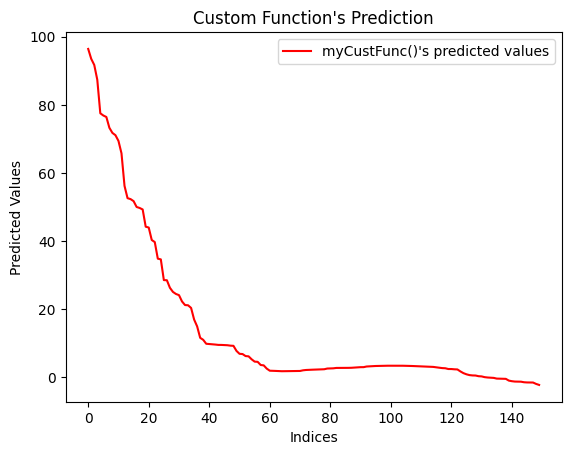

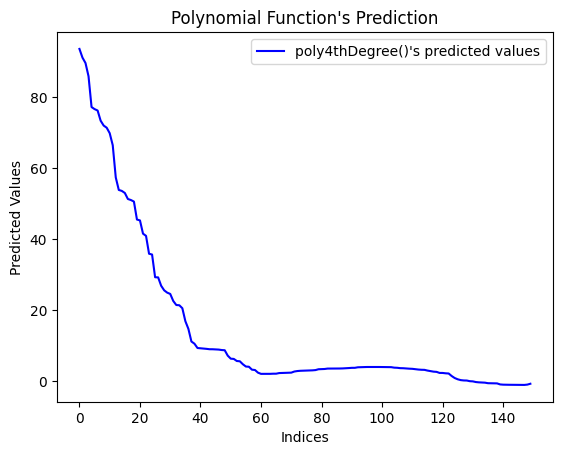

In [9]:
#Δημιουργία λίστας τιμών της συνάρτησης myCustFunc βασισμένες στις εκτιμημένες παραμέτρους λ1 και λ2.
customPredictedList = myCustFunc(sortedList, *customPredictedParameters)

#Δημιουργία λίστας τιμών της συνάρτησης poly4thDegree βασισμένες στις εκτιμημένες παραμέτρους a, b, c, d, e.
polyPredictedList = poly4thDegree(sortedList, *polyPredictedParameters)

#Δημιουργία πρώτου γραφήματος με την πρόβλεψη της συνάρτησης myCustFunc.
plt.plot(customPredictedList, 'r-', label = "myCustFunc()'s predicted values")
plt.legend()
plt.ylabel('Predicted Values')
plt.xlabel('Indices')
plt.title("Custom Function's Prediction")
plt.show()

#Δημιουργία δεύτερου γραφήματος με την πρόβλεψη της συνάρτησης poly4thDegree.
plt.plot(polyPredictedList, 'b-', label = "poly4thDegree()'s predicted values")
plt.legend()
plt.ylabel('Predicted Values')
plt.xlabel('Indices')
plt.title("Polynomial Function's Prediction")
plt.show()

10. Θα υπολογίσετε τα στατιστικά σφάλματα mean absolute error και root mean squared error,
για κάθε ένα από τους ακόλουθους συνδυασμούς:
a. original_values - noisy_values
b. noisy_values - myCustFunc (παράμετροι από ερώτημα 6)
c. noisy_values - poly4thDegree (παράμετροι από ερώτημα 8)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error
#Υπολογισμός Μέσου Απόλυτου Σφάλματος (Mean Absolute Error) και Ρίζας Μέσου Τετραγώνου Σφάλματος (Root Mean Square Error) των ακολούθων συνδυασμών:
#a) original_values - noisy_values
aMae = mean_absolute_error(customProcessedList, customNoisyList)
aRmse = np.sqrt(mean_squared_error(customProcessedList, customNoisyList))

#b) noisy_values - myCustFunc (παράμετροι από ερώτημα 6, εκτίμηση της myCustFunc)
bMae = mean_absolute_error(customNoisyList, customPredictedList)
bRmse = np.sqrt(mean_squared_error(customNoisyList, customPredictedList))

#c) noisy_values - poly4thDegree (παράμετροι από ερώτημα 8, εκτίμηση της poly4thDegree)
cMae = mean_absolute_error(customNoisyList, polyPredictedList)
cRmse = np.sqrt(mean_squared_error(customNoisyList, polyPredictedList))

Τα παραπάνω σφάλματα πρέπει να εμφανίζονται στην οθόνη μαζί με μια πρόταση που να
εξηγεί σε τι αφορούν οι αριθμοί που μόλις τυπώθηκαν.
Πόσο καλή προσέγγιση σας δίνει το πολυώνυμο για το συγκεκριμένο πρόβλημα;

In [11]:
print("Ο όρος Σφάλμα αναφέρεται στη διαφορά μεταξύ της πραγματικής τιμής ενός στοιχείου Α και μίας εκτίμησης της τιμής αυτής Α'.\n\
Το Μέσο Απόλυτο Σφάλμα (Mean Absolute Error) το οποίο υπολογίζεται απο το άθροισμα όλων των απολύτων σφαλμάτων των προβλέψεων διαιρεμένο με το πλήθος τους,\n\
καθώς και η Ρίζα του Μέσου Τετραγώνου Σφάλματος (Root Mean Square Error), η οποία υπολογίζεται\n\
απο την ρίζα του αθροίσματος όλων των τετραγώνων σφαλμάτων των προβλέψεων διαιρεμένο με το πλήθος τους,\n\
εκφράζουν την εκτιμώμενη απόκλιση που θα έχει μία προβλεθείσα τιμή απο την πραγματική της αξία.\n")

print("Υπολογισμός Μέσου Απόλυτου Σφάλματος (Mean Absolute Error) και Ρίζας Μέσου Τετραγώνου Σφάλματος (Root Mean Square Error) των ακολούθων συνδυασμών:\n")

print("a) original values - noisy values (μέση διαφορά των πραγματικών απο τα αλλοιωμένα λόγω του θορύβου δεδομένα)")
print("   myCustFunc - Mean absolute error is: {:.2f}".format(aMae))
print("   myCustFunc - Root mean squared error is: {:.2f}".format(aRmse))

print("\nb) noisy values - myCustFunc (παράμετροι από ερώτημα 6, μέση διαφορά των αλλοιωμένων και των προβλεφθέντων δεδομένων της συνάρτησης myCustFunc)")
print("   myCustFunc - Mean absolute error is: {:.2f}".format(bMae))
print("   myCustFunc - Root mean squared error is: {:.2f}".format(bRmse))

print("\nc) noisy values - poly4thDegree (παράμετροι από ερώτημα 8, μέση διαφορά των αλλοιωμένων και των προβλεφθέντων δεδομένων της συνάρτησης poly4thDegree)")
print("   poly4thDegree - Mean absolute error is: {:.2f}".format(cMae))
print("   poly4thDegree - Root mean squared error is: {:.2f}".format(cRmse))

print("\nΗ προσέγγιση της poly4thDegree για το συγκεκριμένο πρόβλημα είναι πάρα πολύ καλή,\n\
όπως δείχνουν τα χαμηλά και κοντά στο μηδέν Mean Absolute Error = {:.2f}".format(cMae),"και Root Mean Squared Error = {:.2f}.".format(cRmse),"\n\
Όμως, η προσέγγιση της myCustFunc είναι ακόμα καλύτερη (RMSE poly4th: {:.2f}".format(cRmse), "> RMSE custFunc: {:.2f})".format(bRmse),)

Ο όρος Σφάλμα αναφέρεται στη διαφορά μεταξύ της πραγματικής τιμής ενός στοιχείου Α και μίας εκτίμησης της τιμής αυτής Α'.
Το Μέσο Απόλυτο Σφάλμα (Mean Absolute Error) το οποίο υπολογίζεται απο το άθροισμα όλων των απολύτων σφαλμάτων των προβλέψεων διαιρεμένο με το πλήθος τους,
καθώς και η Ρίζα του Μέσου Τετραγώνου Σφάλματος (Root Mean Square Error), η οποία υπολογίζεται
απο την ρίζα του αθροίσματος όλων των τετραγώνων σφαλμάτων των προβλέψεων διαιρεμένο με το πλήθος τους,
εκφράζουν την εκτιμώμενη απόκλιση που θα έχει μία προβλεθείσα τιμή απο την πραγματική της αξία.

Υπολογισμός Μέσου Απόλυτου Σφάλματος (Mean Absolute Error) και Ρίζας Μέσου Τετραγώνου Σφάλματος (Root Mean Square Error) των ακολούθων συνδυασμών:

a) original values - noisy values (μέση διαφορά των πραγματικών απο τα αλλοιωμένα λόγω του θορύβου δεδομένα)
   myCustFunc - Mean absolute error is: 0.92
   myCustFunc - Root mean squared error is: 1.24

b) noisy values - myCustFunc (παράμετροι από ερώτημα 6, μέση διαφορά των α

2o μέρος: προσέγγιση κατάστασης βασιζόμενοι μόνο στις μετρήσεις που έχετε λάβει (υποθέτετε
ότι υπάρχει θόρυβος στις μετρήσεις, δεν έχετε κάποια γνώση σχετική με το μοντέλο που
δημιουργεί τα δεδομένα).

1. Χρησιμοποιείστε τις 150 τιμές, *με θόρυβο*, που δημιουργήσατε στο 1ο μέρος.

In [12]:
print("Οι 150 τίμες με θόρυβο που δημιουργήθηκαν στο 1ο μέρος και θα χρησιμοποιηθούν στο 2ο μέρος της εργασίας είναι οι εξής: \n",*customNoisyList)

Οι 150 τίμες με θόρυβο που δημιουργήθηκαν στο 1ο μέρος και θα χρησιμοποιηθούν στο 2ο μέρος της εργασίας είναι οι εξής: 
 95.57018240641875 93.41198726660855 92.10015270206253 88.08776231254646 77.73256342167932 76.94331226660216 75.79776515761927 73.37961603422723 71.45904468727626 69.67280978412387 73.18299342565301 66.24623356240043 56.40669641383784 50.994649971205135 52.638405671510895 52.41483810211865 47.90986367840491 49.59198571936859 48.25516671553394 44.520027967583296 45.751062731804545 40.099217591105834 40.024223685781905 36.26787574835807 29.426005016829222 27.02541281978902 26.923036401227886 26.26636203424387 24.770562945980444 24.962824792002255 22.376309604065803 23.097892381508967 22.087791190396764 21.336250487931693 20.091811997702766 19.17814384863052 14.923083358802169 13.391205195090736 11.979885635143273 9.551059294765324 7.830244432778217 10.07432372763909 10.298703536110143 9.546619038187094 8.642281361718142 11.629121327172518 10.222501236917685 9.9860955757

2. Διαχωρίστε τα διαθέσιμα δεδομένα, [x_input, y_noisy], σε τρία επιμέρους υποσύνολα:
train, validation, και test.

In [13]:
#Δημιουργία πίνακα με τυχαίους αριθμούς απο το 0 έως το 149. Οι αριθμοί αυτοί θα χρησιμοποιηθούν ως δείκτες πίνακα.
indexes = np.random.permutation(150)

#Υπολογισμός του ποσοστού των συνολικών δεδομένων το οποίο θα φιλοξενεί κάθε υποσύνολο.
trainDatPerc = 0.7
valDatPerc = trainDatPerc / 10
testDatPec = 1 - trainDatPerc - valDatPerc

#Καταμερισμός των διαθέσιμων δεικτών σε πίνακες
trainInd = indexes[0:int(trainDatPerc*len(indexes))]
valInd = indexes[int(trainDatPerc*len(indexes) + 1):int((trainDatPerc+valDatPerc)*len(indexes))]
testInd = indexes[int((trainDatPerc+valDatPerc)*len(indexes)) + 1:]

#Προσαρμογή των διαστάσεων του πίνακα για την εκπαίδευση των μοντέλων.
sortedList = sortedList.reshape(-1,1)

#Διαμοιρασμός των δεδομένων απο τις αρχικές λίστες sortedList και customNoisyList σε υποσύνολα με χρήση των αντίστοιχων πινάκων δεικτών
trainingInput = sortedList[trainInd]
trainingOutput = customNoisyList[trainInd]
valInput = sortedList[valInd]
valOutput = customNoisyList[valInd]
testInput = sortedList[testInd]
testOutput = customNoisyList[testInd]

3. Εκπαιδεύστε τρεις διαφορετικούς regressors (π.χ. kNN, SVR, κ.λπ.) της επιλογής σας, πάνω
στο train set.

In [14]:
#Εκπαίδευση kNN regressor στο trainingInput
from sklearn.neighbors import KNeighborsRegressor
knnReg = KNeighborsRegressor(n_neighbors = 1)
knnReg = knnReg.fit(trainingInput, trainingOutput)

#Εκπαίδευση SVR regressor στο trainingInput
from sklearn.svm import SVR
svmReg = SVR(kernel = 'rbf')
svmReg = svmReg.fit(trainingInput, trainingOutput)

#Εκπαίδευση Polynomial regressor στο trainingInput
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree = 7, include_bias = False)
poly_features = poly.fit_transform(trainingInput)
polyReg = LinearRegression()
polyReg = polyReg.fit(poly_features, trainingOutput)

*4*. Αξιολογήστε την απόδοση των regressors πάνω στο test set και δημιουργείστε κατάλληλες
γραφικές παραστάσεις που να φαίνονται τα αποτελέσματα.

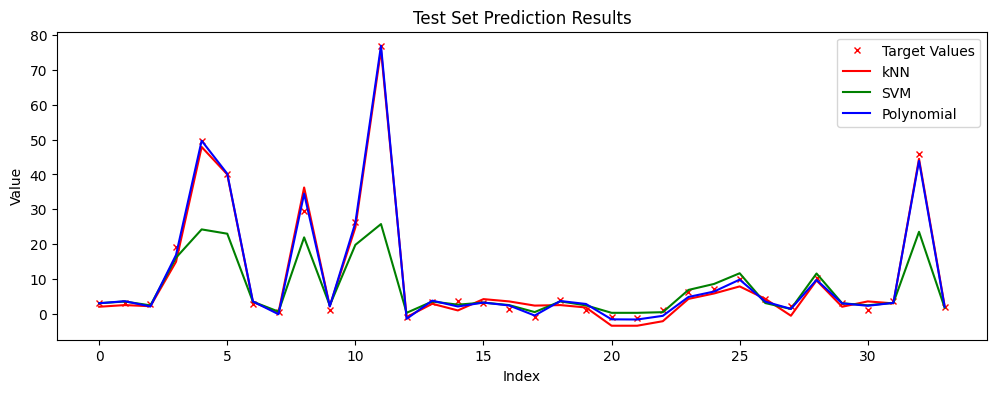


Υπολογισμός Μέσου Απόλυτου Σφάλματος (Mean Absolute Error), Ρίζας Μέσου Τετραγώνου Σφάλματος (Root Mean Square Error) και Μεγίστου Σφάλματος (Maximum Error) των ακολούθων συνδυασμών: 

a) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του μοντέλου kNN
   Mean absolute error is: 1.59
   Root mean squared error is: 2.10
   Maximum error is: 6.84

b) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του μοντέλου SVM
   Mean absolute error is: 4.55
   Root mean squared error is: 11.09
   Maximum error is: 51.19

c) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του Πολυωνυμικού μοντέλου
   Mean absolute error is: 0.83
   Root mean squared error is: 1.25
   Maximum error is: 5.06

Σύμφωνα με τα Mean Absolute Error και Root Mean Squared Error είναι εμφανές ότι το Πολυωνυμικό μοντέλο 
είναι το καλύτερο απο τα τρία. Έχει τις πιο χαμηλές αποκλίσεις σε σχέση με τα υπόλοιπα εκπαιδευμένα μοντέλα,
ενώ στη δεύτερη θέση ακολουθεί το μοντέλο kNN με λίγο μεγαλύτερες αποκλίσεις. Αντίθετα η περίπτωση του 
SVM μοντέλου παρουσιά

In [15]:
#Πρόβλεψη με βάση το test data set.
predictedOutputsknn = knnReg.predict(testInput)
predictedOutputssvm = svmReg.predict(testInput)
predictedOutputspoly = polyReg.predict(poly.transform(testInput))

#Δημιουργία γραφήματος με τις πραγματικές τιμές και τις εκτιμημένες τιμές των μοντέλων.
plt.figure(figsize=(12, 4))
plt.plot(testOutput,'rx', label = 'Target Values', markersize = 4)
plt.plot(predictedOutputsknn, 'r-', label = 'kNN')
plt.plot(predictedOutputssvm, 'g-', label = 'SVM')
plt.plot(predictedOutputspoly, 'b-', label = 'Polynomial')
plt.legend(loc = 'best')
plt.title("Test Set Prediction Results")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

#Υπολογισμός Μέσου Απόλυτου Σφάλματος (Mean Absolute Error), Ρίζας Μέσου Τετραγώνου Σφάλματος (Root Mean Square Error) και Μεγίστου Σφάλματος (Maximum Error) των ακολούθων συνδυασμών:
#a) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του μοντέλου kNN
mae_knn = mean_absolute_error(testOutput, predictedOutputsknn)
rmse_knn = np.sqrt(mean_squared_error(testOutput, predictedOutputsknn))
max_knn = max_error(testOutput, predictedOutputsknn)

#b) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του μοντέλου SVM
mae_svm = mean_absolute_error(testOutput, predictedOutputssvm)
rmse_svm = np.sqrt(mean_squared_error(testOutput, predictedOutputssvm))
max_svm = max_error(testOutput, predictedOutputssvm)

#c) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του Πολυωνυμικού μοντέλου
mae_poly = mean_absolute_error(testOutput, predictedOutputspoly)
rmse_poly = np.sqrt(mean_squared_error(testOutput, predictedOutputspoly))
max_poly = max_error(testOutput, predictedOutputspoly)

#Εκτύπωση των τιμών.
print("\nΥπολογισμός Μέσου Απόλυτου Σφάλματος (Mean Absolute Error), Ρίζας Μέσου Τετραγώνου Σφάλματος (Root Mean Square Error) και Μεγίστου Σφάλματος (Maximum Error) των ακολούθων συνδυασμών: \n")
print("a) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του μοντέλου kNN")
print("   Mean absolute error is: {:.2f}".format(mae_knn))
print("   Root mean squared error is: {:.2f}".format(rmse_knn))
print("   Maximum error is: {:.2f}\n".format(max_knn))

print("b) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του μοντέλου SVM")
print("   Mean absolute error is: {:.2f}".format(mae_svm))
print("   Root mean squared error is: {:.2f}".format(rmse_svm))
print("   Maximum error is: {:.2f}\n".format(max_svm))

print("c) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του Πολυωνυμικού μοντέλου")
print("   Mean absolute error is: {:.2f}".format(mae_poly))
print("   Root mean squared error is: {:.2f}".format(rmse_poly))
print("   Maximum error is: {:.2f}".format(max_poly))

#Αξιολόγηση της απόδοσης των regressors.
print("\nΣύμφωνα με τα Mean Absolute Error και Root Mean Squared Error είναι εμφανές ότι το Πολυωνυμικό μοντέλο \n\
είναι το καλύτερο απο τα τρία. Έχει τις πιο χαμηλές αποκλίσεις σε σχέση με τα υπόλοιπα εκπαιδευμένα μοντέλα,\n\
ενώ στη δεύτερη θέση ακολουθεί το μοντέλο kNN με λίγο μεγαλύτερες αποκλίσεις. Αντίθετα η περίπτωση του \n\
SVM μοντέλου παρουσιάζει προβλέψεις ανακριβείς με υπέρμετρο Maximum Error και υψηλές αποκλίσεις απο τις πραγματικές τιμές.")

5. Επαναλάβετε τα βήματα 2 έως 4, αλλά αυτή την φορά κανονικοποιείστε τις τιμές εισόδου
στο διάστημα [0,1]

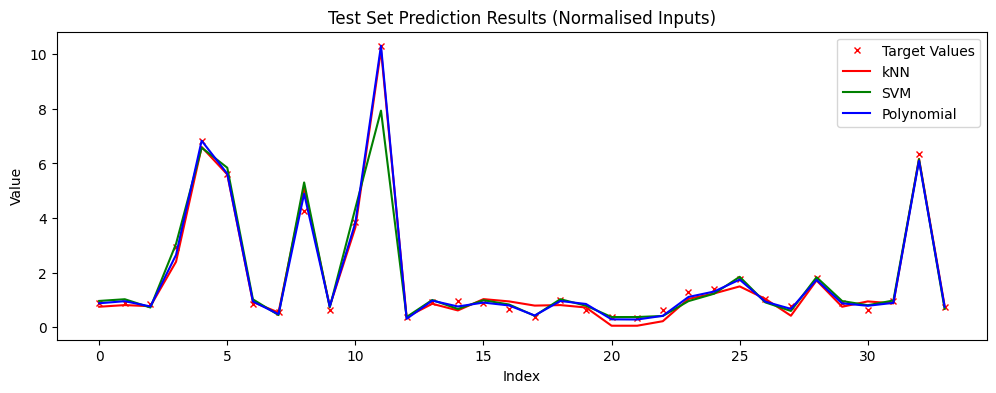


Υπολογισμός Μέσου Απόλυτου Σφάλματος (Mean Absolute Error), Ρίζας Μέσου Τετραγώνου Σφάλματος (Root Mean Square Error) και Μεγίστου Σφάλματος (Maximum Error) των ακολούθων συνδυασμών: 

a) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του μοντέλου kNN
   Mean absolute error is: 0.20
   Root mean squared error is: 0.27
   Maximum error is: 0.87

b) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του μοντέλου SVM
   Mean absolute error is: 0.23
   Root mean squared error is: 0.48
   Maximum error is: 2.37

c) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του Πολυωνυμικού μοντέλου 
   Mean absolute error is: 0.11
   Root mean squared error is: 0.16
   Maximum error is: 0.65

Σύμφωνα με τα Mean Absolute Error και Root Mean Squared Error είναι εμφανές ότι το Πολυωνυμικό μοντέλο 
είναι το καλύτερο απο τα τρία. Έχει τις πιο χαμηλές αποκλίσεις σε σχέση με τα υπόλοιπα εκπαιδευμένα μοντέλα,
ενώ στη δεύτερη θέση ακολουθεί το μοντέλο kNN με λίγο μεγαλύτερες αποκλίσεις. Αξιοσημείωτη είναι η διαφορά του 
SVM μοντέλου τ

In [16]:
#Κανονικοποίση των δεδομένων στο διάστημα [0,1].
from sklearn.preprocessing import MinMaxScaler
scaler_inputs = MinMaxScaler(feature_range = (0, 1))

scaledTrainingInput = scaler_inputs.fit_transform(trainingInput)
scaledValInput = scaler_inputs.transform(valInput)
scaledTestInput = scaler_inputs.transform(testInput)

scaledTrainingOutput = scaler_inputs.transform(trainingOutput.reshape(-1,1))
scaledValOutput = scaler_inputs.transform(valOutput.reshape(-1,1))
scaledTestOutput = scaler_inputs.transform(testOutput.reshape(-1,1))

#Εκπαίδευση kNN regressor στο scaledTrainingInput
knnReg = KNeighborsRegressor(n_neighbors = 1)
knnReg.fit(scaledTrainingInput, scaledTrainingOutput)

#Εκπαίδευση SVR regressor στο scaledTrainingInput
svmReg = SVR(kernel = 'rbf')
svmReg.fit(scaledTrainingInput, scaledTrainingOutput.ravel())

#Εκπαίδευση Polynomial regressor στο scaledTrainingInput
poly = PolynomialFeatures(degree = 7, include_bias = False)
poly_features = poly.fit_transform(scaledTrainingInput)
polyReg = LinearRegression()
polyReg.fit(poly_features, scaledTrainingOutput)

#Πρόβλεψη με βάση το scaled test data set.
predictedOutputsknn = knnReg.predict(scaledTestInput)
predictedOutputssvm = svmReg.predict(scaledTestInput)
predictedOutputspoly = polyReg.predict(poly.fit_transform(scaledTestInput))

#Δημιουργία γραφήματος με τις πραγματικές τιμές και τις εκτιμημένες τιμές των μοντέλων.
plt.figure(figsize=(12, 4))
plt.plot(scaledTestOutput, 'rx', label = 'Target Values', markersize = 4)
plt.plot(predictedOutputsknn, 'r-', label = 'kNN')
plt.plot(predictedOutputssvm, 'g-', label = 'SVM')
plt.plot(predictedOutputspoly, 'b-', label = 'Polynomial')
plt.legend(loc='best')
plt.title("Test Set Prediction Results (Normalised Inputs)")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

#Υπολογισμός Μέσου Απόλυτου Σφάλματος (Mean Absolute Error), Ρίζας Μέσου Τετραγώνου Σφάλματος (Root Mean Square Error) και Μεγίστου Σφάλματος (Maximum Error) των ακολούθων συνδυασμών:
#a) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του μοντέλου kNN
mae_knn = mean_absolute_error(scaledTestOutput, predictedOutputsknn)
rmse_knn = np.sqrt(mean_squared_error(scaledTestOutput, predictedOutputsknn))
max_knn = max_error(scaledTestOutput, predictedOutputsknn)

#b) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του μοντέλου SVM
mae_svm = mean_absolute_error(scaledTestOutput, predictedOutputssvm)
rmse_svm = np.sqrt(mean_squared_error(scaledTestOutput, predictedOutputssvm))
max_svm = max_error(scaledTestOutput, predictedOutputssvm)

#c) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του Πολυωνυμικού μοντέλου
mae_poly = mean_absolute_error(scaledTestOutput, predictedOutputspoly)
rmse_poly = np.sqrt(mean_squared_error(scaledTestOutput, predictedOutputspoly))
max_poly = max_error(scaledTestOutput, predictedOutputspoly)

#Εκτύπωση των τιμών.
print("\nΥπολογισμός Μέσου Απόλυτου Σφάλματος (Mean Absolute Error), Ρίζας Μέσου Τετραγώνου Σφάλματος (Root Mean Square Error) και Μεγίστου Σφάλματος (Maximum Error) των ακολούθων συνδυασμών: \n")
print("a) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του μοντέλου kNN")
print("   Mean absolute error is: {:.2f}".format(mae_knn))
print("   Root mean squared error is: {:.2f}".format(rmse_knn))
print("   Maximum error is: {:.2f}\n".format(max_knn))

print("b) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του μοντέλου SVM")
print("   Mean absolute error is: {:.2f}".format(mae_svm))
print("   Root mean squared error is: {:.2f}".format(rmse_svm))
print("   Maximum error is: {:.2f}\n".format(max_svm))

print("c) Πραγματικές Τιμές - Προβλεφθείσες Τιμές του Πολυωνυμικού μοντέλου ")
print("   Mean absolute error is: {:.2f}".format(mae_poly))
print("   Root mean squared error is: {:.2f}".format(rmse_poly))
print("   Maximum error is: {:.2f}".format(max_poly))

#Αξιολόγηση της απόδοσης των regressors.
print("\nΣύμφωνα με τα Mean Absolute Error και Root Mean Squared Error είναι εμφανές ότι το Πολυωνυμικό μοντέλο \n\
είναι το καλύτερο απο τα τρία. Έχει τις πιο χαμηλές αποκλίσεις σε σχέση με τα υπόλοιπα εκπαιδευμένα μοντέλα,\n\
ενώ στη δεύτερη θέση ακολουθεί το μοντέλο kNN με λίγο μεγαλύτερες αποκλίσεις. Αξιοσημείωτη είναι η διαφορά του \n\
SVM μοντέλου το οποίο, ενώ έδειξε βελτιωμένη απόδοση με κανονικοποιημένα δεδομένα, παραμένει κατά πολύ \n\
χειρότερο στις προβλέψεις απο τα άλλα.")